### 0. Importaciones necesarias

In [44]:
import bootcampviztools as bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

import lightgbm as lgb


### 1. Carga y vistazo de datos

In [2]:
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_test = pd.read_csv('../data/test.csv', index_col=0)

df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_train = df_train.set_index('id')
df_test = df_test.set_index('id')

df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904

In [5]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Mirar nulos:

In [6]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df_train['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: count, Length: 455, dtype: int64

In [8]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

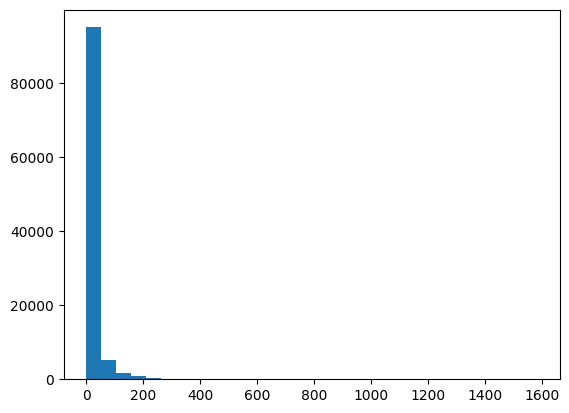

In [9]:
plt.hist(df_train['Arrival Delay in Minutes'], bins = 30);

Mirar duplicados:

In [10]:
df_train.duplicated().sum()

0

Mirar si el target si está balanceado o no:

In [11]:
df_train.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [12]:
df_train.satisfaction.value_counts(True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

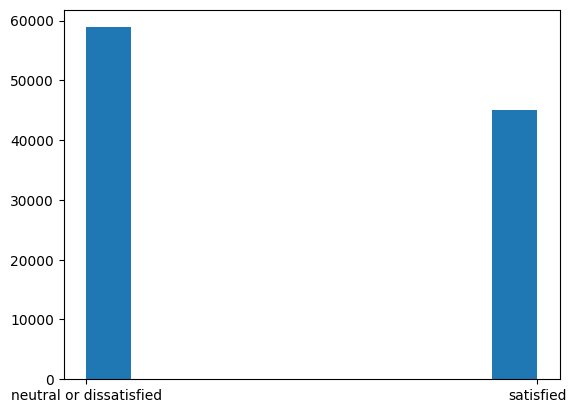

In [13]:
plt.hist(df_train.satisfaction);

Pipeline 1

In [14]:
# Función para eliminar columnas con más del 50% de nulos
def drop_high_null_columns(df, threshold=50):
    null_percentage = df.isnull().mean() * 100
    cols_to_drop = null_percentage[null_percentage > threshold].index
    return df.drop(columns=cols_to_drop)

# Función para eliminar filas con nulos restantes
def drop_remaining_nulls(df):
    return df.dropna()

# Función para eliminar duplicados
def drop_duplicates(df):
    return df.drop_duplicates()

data_pipeline = Pipeline([
    ('drop_high_nulls', FunctionTransformer(drop_high_null_columns)),  # Elimina columnas con muchos nulos
    ('drop_remaining_nulls', FunctionTransformer(drop_remaining_nulls)),  # Elimina filas con nulos
    ('drop_duplicates', FunctionTransformer(drop_duplicates))  # Elimina duplicados
])

df_train_cleaned = data_pipeline.fit_transform(df_train)
df_test_cleaned = data_pipeline.fit_transform(df_test)
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594

Mirar que transformaciones haremos en las columnas en un pipeline:
- gender: binaria
- Customer Type:binaria
- Age =
- 'Type of Travel': binaria
- Class: ordinal encoding/one hot (hay 3 clases)
- todas las numéricas = (luego miraremos si hacer log o no)
- satisfaction: binaria

In [15]:
df_train_cleaned['Customer Type'].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

In [16]:
df_train_cleaned['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [17]:
df_train_cleaned['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [18]:
df_train_cleaned.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Pipeline 2

In [19]:
target = 'satisfaction'

In [20]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594

In [21]:
df_train_cleaned['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [22]:
#Identificar tipos de columnas automáticamente
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
binary_cols = [col for col in df_train_cleaned.select_dtypes(include=['object']).columns if df_train_cleaned[col].nunique() == 2]
#binary_cols = binary_cols.remove(target)




In [23]:
binary_cols.remove('satisfaction')

In [24]:
binary_cols

['Gender', 'Customer Type', 'Type of Travel']

In [25]:
numerical_cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [26]:
onehot_cols = [col for col in df_train_cleaned.columns if col not in numerical_cols and col not in binary_cols and col not in target]

In [27]:
onehot_cols

['Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

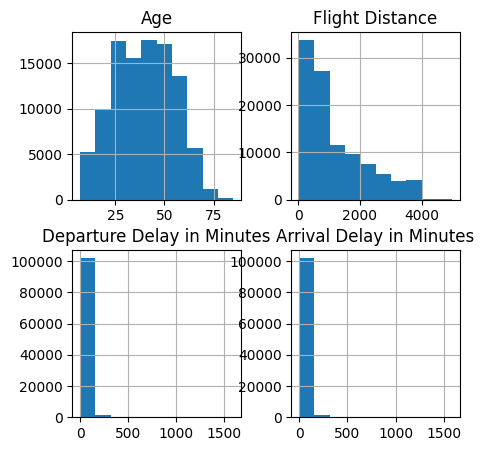

In [28]:
df_train_cleaned[numerical_cols].hist(figsize = (5,5))
plt.tight_layout
plt.show()

In [29]:
#features numericas a las que aplicar logaritmo:
numerical_cols_log = [col for col in numerical_cols if col != 'Age']

In [30]:
numerical_cols_log

['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

# Transformador personalizado para aplicar logaritmo a variables numéricas positivas
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self  # No necesita ajuste

    def transform(self, X):
        X_transformed = X.copy()
        # Aplicar logaritmo solo a las columnas especificadas
        X_transformed[self.cols] = np.log1p(X_transformed[self.cols])  # np.log1p(x) = log(x + 1) para evitar log(0)
        return X_transformed


# Crear el pipeline con el transformador de logaritmo
log_pipeline = Pipeline([
    ('log_transform', LogTransformer(numerical_cols_log))
])

In [32]:
df_train_cleaned = log_pipeline.fit_transform(df_train_cleaned)
df_test_cleaned = log_pipeline.fit_transform(df_test_cleaned)

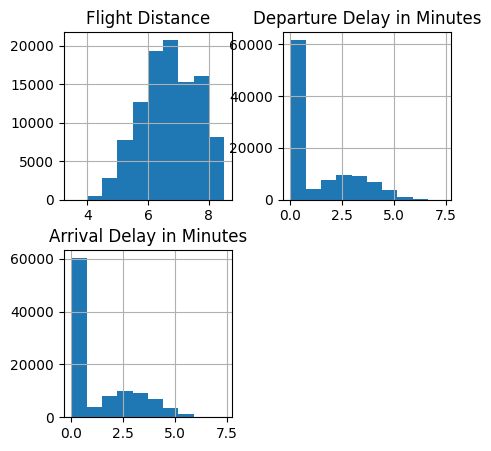

In [33]:
df_train_cleaned[numerical_cols_log].hist(figsize = (5,5))
plt.tight_layout
plt.show()

In [ ]:
numerical_cols = numerical_cols_log + ['Age']

In [35]:
numerical_cols

['Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Age']

In [36]:
#Función para aplicar Label Encoding a variables binarias SIN cambiar nombres
def label_encode_binary(X):
    X_encoded = X.copy()
    for col in X_encoded.columns:
        X_encoded[col] = X_encoded[col].astype("category").cat.codes
    return pd.DataFrame(X_encoded, columns=X.columns)  # Mantiene los nombres originales

# Función para binarizar la variable 'satisfaction'
def binarize_satisfaction(X):
    return X.replace({"neutral or dissatisfied": 0, "satisfied": 1})

In [37]:
# Definir transformaciones
preprocessor = ColumnTransformer([
    ("target", FunctionTransformer(binarize_satisfaction, feature_names_out="one-to-one"), ["satisfaction"]),  # Binarización del target
    ("binary", FunctionTransformer(label_encode_binary, feature_names_out="one-to-one"), binary_cols),  # Label Encoding para binarias
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),  # OneHotEncoder para categóricas con más de 2 clases
    ("scaler", StandardScaler(), numerical_cols)  # Escalado de numéricas
], remainder='passthrough')  # Mantiene columnas que no requieren transformación

# Crear pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Ajustar el pipeline en el dataset de entrenamiento
pipeline.fit(df_train_cleaned)

# Transformar ambos conjuntos de datos (sin volver a ajustar)
array_transformed = pipeline.transform(df_train_cleaned)
array_test_transformed = pipeline.transform(df_test_cleaned)

# Obtener nombres de columnas DESPUÉS de entrenar en train
feature_names = preprocessor.get_feature_names_out()

# Convertir a DataFrame con nombres de columnas correctos
df_transformed = pd.DataFrame(array_transformed, columns=feature_names)
df_test_transformed = pd.DataFrame(array_test_transformed, columns=feature_names)

df_transformed.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_18684\4094233868.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace({"neutral or dissatisfied": 0, "satisfied": 1})
C:\Users\maria\AppData\Local\Temp\ipykernel_18684\4094233868.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace({"neutral or dissatisfied": 0, "satisfied": 1})
C:\Users\maria\AppData\Local\Temp\ipykernel_18684\4094233868.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To ret

,target__satisfaction,binary__Gender,binary__Customer Type,binary__Type of Travel,onehot__Class_Business,onehot__Class_Eco,onehot__Class_Eco Plus,onehot__Inflight wifi service_0,onehot__Inflight wifi service_1,onehot__Inflight wifi service_2,...,onehot__Cleanliness_0,onehot__Cleanliness_1,onehot__Cleanliness_2,onehot__Cleanliness_3,onehot__Cleanliness_4,onehot__Cleanliness_5,scaler__Flight Distance,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes,scaler__Age
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.624644,1.251013,1.029680,-1.745542
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.355868,-0.333781,0.417532,-0.951526
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.366986,-0.762053,-0.775410,-0.885358
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.406356,0.773286,0.636191,-0.951526
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.457644,-0.762053,-0.775410,1.430521


In [38]:
array_transformed.shape

(103594, 94)

In [39]:
# Obtener nombres originales y nuevos nombres
target = ['satisfaction']
binary_names = pipeline.named_steps['preprocessor'].named_transformers_['binary'].get_feature_names_out(binary_cols).tolist()  
onehot_names = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_cols).tolist()
numerical_names = pipeline.named_steps['preprocessor'].named_transformers_['scaler'].get_feature_names_out(numerical_cols).tolist()  


# Crear nuevo DataFrame con nombres originales o adaptados

new_col_names = target + binary_names + onehot_names + numerical_names 
df_transformed = pd.DataFrame(array_transformed, columns=new_col_names)
df_test_transformed = pd.DataFrame(array_test_transformed, columns=new_col_names)

df_transformed.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Age
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.624644,1.251013,1.029680,-1.745542
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.355868,-0.333781,0.417532,-0.951526
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.366986,-0.762053,-0.775410,-0.885358
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.406356,0.773286,0.636191,-0.951526
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.457644,-0.762053,-0.775410,1.430521


In [40]:
# Dividir datos en x e y
X_train = df_transformed.drop('satisfaction', axis=1)
y_train = df_transformed["satisfaction"]
X_test = df_test_transformed.drop(target, axis = 1)
y_test = df_test_transformed["satisfaction"]

In [41]:
# Definir modelos base sin hiperparámetros ajustados
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "LightGBM": lgb.LGBMClassifier()
}

In [42]:
# Evaluar los modelos base con Balanced Accuracy
scores = {}

for model_name, model in models.items():
    print(f"Entrenando {model_name}...")

    # Crear pipeline para cada modelo sin preprocesamiento, ya que X_train y X_test ya están transformados
    pipeline_model = Pipeline([
        ("model", model)
    ])

    # Entrenar el modelo
    pipeline_model.fit(X_train, y_train)

    # Predecir en test
    y_pred = pipeline_model.predict(X_test)

    # Evaluar usando balanced_accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    scores[model_name] = balanced_acc

    print(f"{model_name} - Balanced Accuracy: {balanced_acc:.4f}")

# Mostrar los resultados finales ordenados
print("\nResultados finales de los modelos:")
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

Entrenando RandomForest...
RandomForest - Balanced Accuracy: 0.9586
Entrenando GradientBoosting...
GradientBoosting - Balanced Accuracy: 0.9411
Entrenando LogisticRegression...
LogisticRegression - Balanced Accuracy: 0.9322
Entrenando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433394 -> initscore=-0.268018
[LightGBM] [Info] Start training from score -0.268018
LightGBM - Balanced Accuracy: 0.9614

Resultados finales de los modelos:
LightGBM: 0.9614
RandomForest: 0.9586
Gra

In [47]:
# Seleccionar el mejor modelo basado en balanced_accuracy
best_model_name = max(scores, key=scores.get)  # Modelo con mayor balanced_accuracy
print(f"\n Modelo seleccionado para optimización: {best_model_name}")

param_grid = {
    "RandomForest": {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20]},
    "GradientBoosting": {"model__n_estimators": [50, 100], "model__learning_rate": [0.01, 0.1]},
    "LightGBM": {"model__num_leaves": [31, 50], "model__learning_rate": [0.01, 0.1]}
}

# Optimizar hiperparámetros en el mejor modelo
print(f"\n Buscando mejores hiperparámetros para {best_model_name}...")

pipeline = Pipeline([
    ("model", models[best_model_name])  # Solo el mejor modelo
])

grid_search = GridSearchCV(pipeline, param_grid[best_model_name], cv=5, scoring="balanced_accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)


 Modelo seleccionado para optimización: LightGBM

 Buscando mejores hiperparámetros para LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433394 -> initscore=-0.268018
[LightGBM] [Info] Start training from score -0.268018


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__num_leaves': [31, 50]},
             scoring='balanced_accuracy')

In [49]:
# Evaluar en test
y_pred = grid_search.best_estimator_.predict(X_test)
best_score = balanced_accuracy_score(y_test, y_pred)

print(f"\n {best_model_name} - Mejor Balanced Accuracy después de ajuste: {best_score:.4f}")

# Guardar el mejor modelo
best_model = grid_search.best_estimator_


 LightGBM - Mejor Balanced Accuracy después de ajuste: 0.9623


In [ ]:
# Classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte en un DataFrame
report_df = pd.DataFrame(report).T  # Transponer para mejor visualización

# Mostrar el classification report como tabla
report_df

,precision,recall,f1-score,support
0.0,0.957387,0.980452,0.968782,14528.000000
1.0,0.974217,0.944215,0.958981,11365.000000
accuracy,0.964546,0.964546,0.964546,0.964546
macro avg,0.965802,0.962333,0.963882,25893.000000
weighted avg,0.964774,0.964546,0.964480,25893.000000


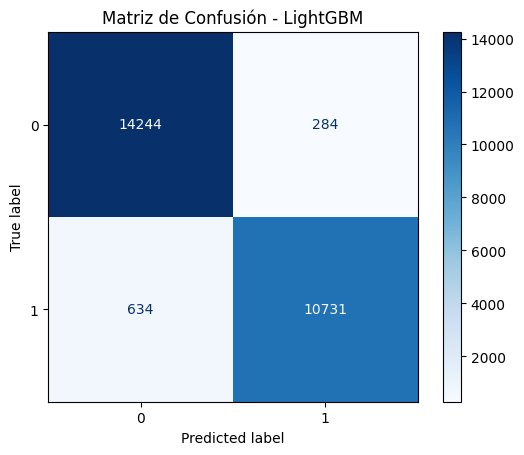

In [53]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_18684\1021415834.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")


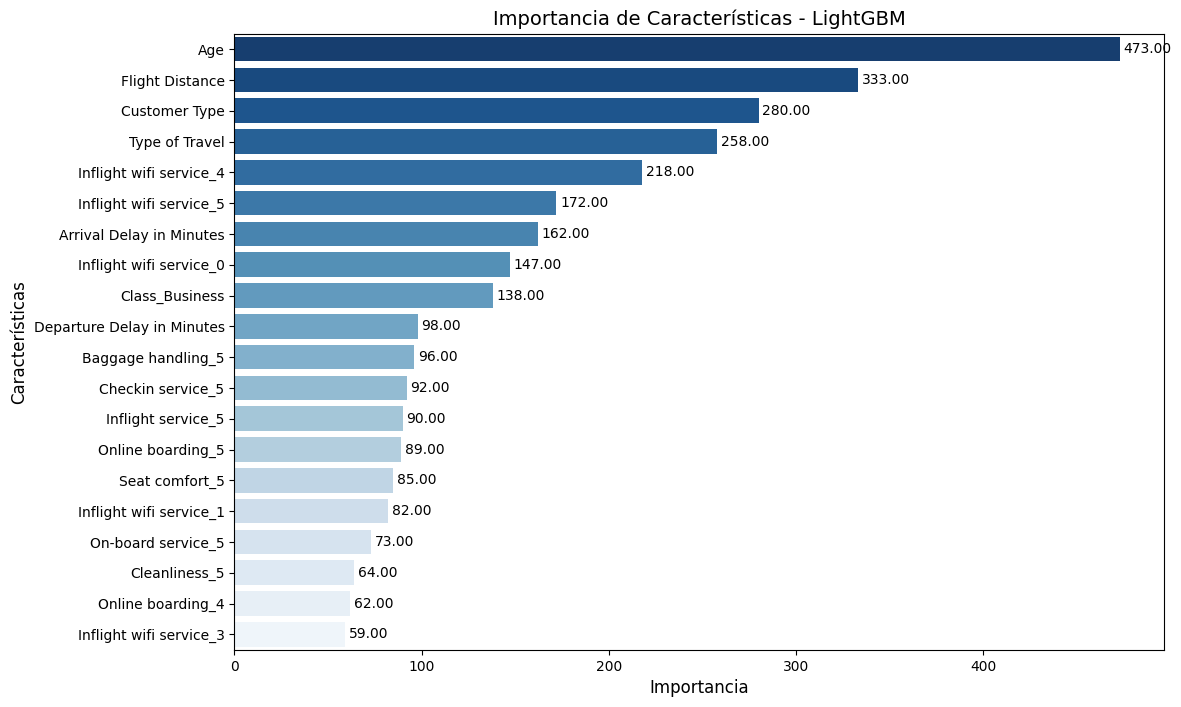

In [60]:
# Importancia de características (solo para modelos de árboles)
if best_model_name in ["RandomForest", "GradientBoosting", "LightGBM"]:
    importances = best_model.named_steps["model"].feature_importances_
    feature_names = X_train.columns

    # Crear un DataFrame ordenado por importancia
    feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).head(20)  # Mostrar solo las 20 más importantes

    # Graficar la importancia de características
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="Blues_r")

    # Etiquetas y título
    plt.title(f"Importancia de Características - {best_model_name}", fontsize=14)
    plt.xlabel("Importancia", fontsize=12)
    plt.ylabel("Características", fontsize=12)

    # Ajustar etiquetas para mejor legibilidad
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Mostrar valores sobre las barras
    for index, value in enumerate(feature_importance_df["Importance"]):
        plt.text(value + 2, index, f"{value:.2f}", fontsize=10, verticalalignment="center")

    plt.show()